In [ ]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
# import pyLDAvis.gensim_models

In [ ]:
# file load
train = pd.read_csv('data/train.csv', encoding='utf-8')
test = pd.read_csv('data/test_x.csv', encoding='utf-8')
sample_submission = pd.read_csv('data/sample_submission.csv', encoding='utf-8')

In [ ]:
train

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,54875,"I told my plan to the captain, and between us ...",4
54876,54876,"""Your sincere well-wisher, friend, and sister...",1
54877,54877,“Then you wanted me to lend you money?”,3


In [ ]:
test

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...
...,...,...
19612,19612,"At the end of another day or two, odin growing..."
19613,19613,"All afternoon we sat together, mostly in silen..."
19614,19614,"odin, having carried his thanks to odin, proc..."
19615,19615,"Soon after this, upon odin's leaving the room,..."


In [ ]:
# 작가별 데이터 수
train['author'].value_counts()

3    15063
0    13235
2    11554
4     7805
1     7222
Name: author, dtype: int64

<AxesSubplot:title={'center':'number by author'}, xlabel='author'>

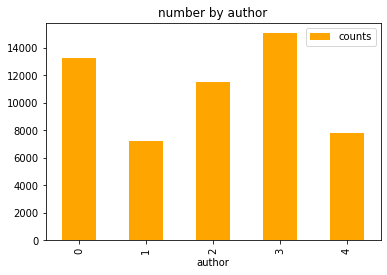

In [ ]:
# train['author'].value_counts().plot(kind='bar')
train.groupby(train['author']).size().reset_index(name="counts").\
    plot.bar(x='author', title='number by author', color='orange')

<AxesSubplot:>

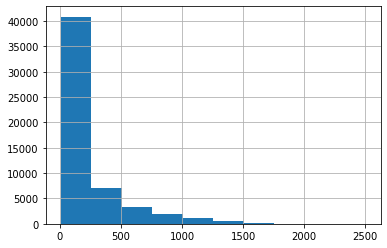

In [ ]:
# 문자 길이 분포도
# train['text'].str.len()
train['text'].str.len().hist()

In [ ]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x : len(x)).hist()

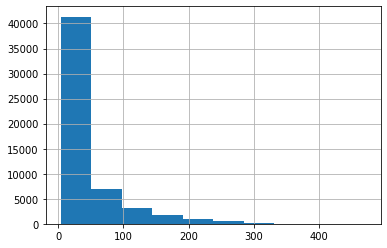

In [ ]:
plot_word_number_histogram(train['text'])

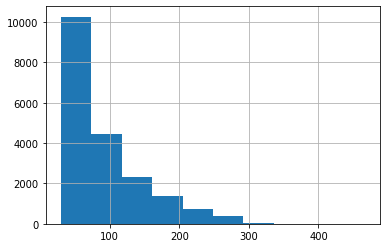

In [ ]:
plot_word_number_histogram(test['text'])

In [ ]:
def plot_word_length_histogram(text):
    text.str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).\
    hist()

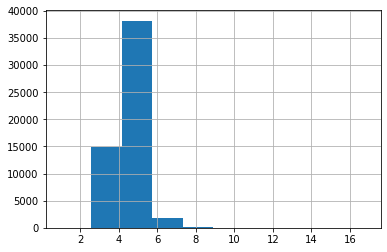

In [ ]:
plot_word_length_histogram(train['text'])

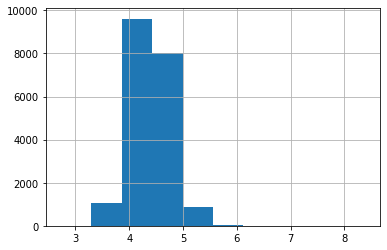

In [ ]:
plot_word_length_histogram(test['text'])

In [ ]:
# nltk.download('stopwords')
# stop = set(stopwords.words('english'))

In [ ]:
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
    x, y = zip(*top)
    plt.bar(x, y)

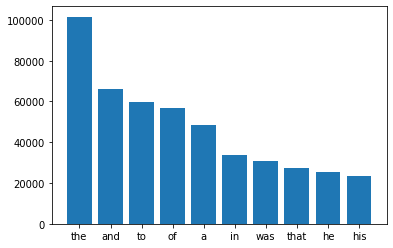

In [ ]:
plot_top_stopwords_barchart(train['text'])

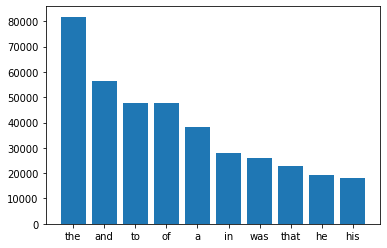

In [ ]:
plot_top_stopwords_barchart(test['text'])

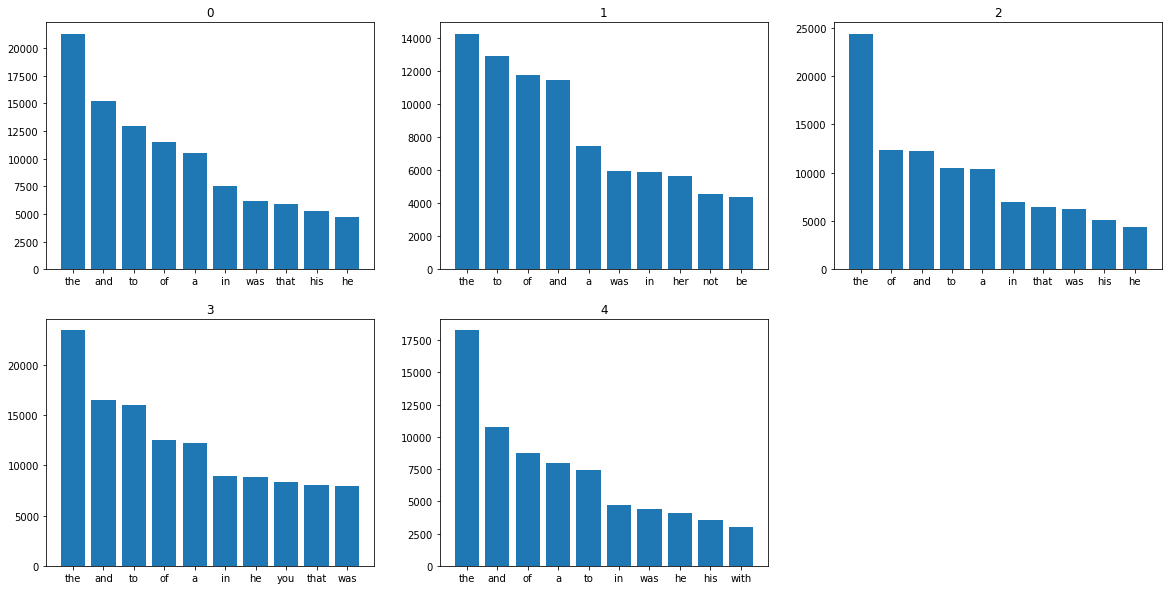

In [ ]:
fig = plt.figure(figsize=(20, 10))
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    return x, y

for i in range(5):
    x,y = plot_top_stopwords_barchart2(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    ax.bar(x,y)

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus) # Counter -> dictionary type: {'word':count, ...}

    most = counter.most_common() # most_common -> 가장 많이 산출된 것.. most_common(n=?)
    x, y = [], []
    for word, count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x) # x축 count, y축 word

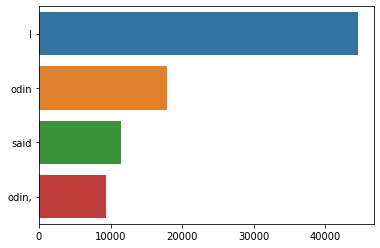

In [ ]:
# text 전체
plot_top_non_stopwords_barchart(train['text'])

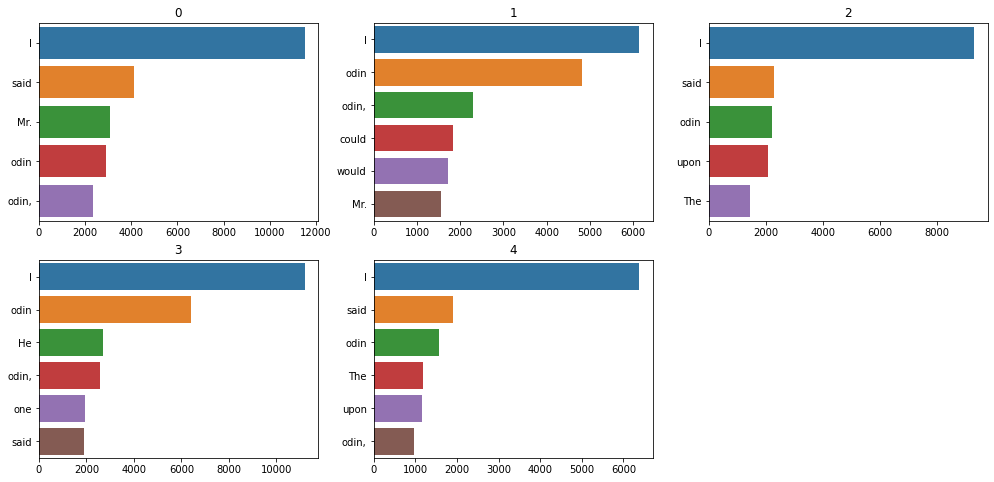

In [ ]:
# author(작가)별 분류
fig = plt.figure(figsize=(17, 8))
rows = 2
cols = 3

def plot_top_non_stopwords_barchart2(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart2(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

In [ ]:
# 불용어를 제거해주는 함수
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# 불용어
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
# 부호를 제거해주는 함수
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

train['text']=train['text'].apply(alpha_num)

In [ ]:
# 부호가 제거된 train을 확인
train

,index,text,author
0,0,He was almost choking There was so much so muc...,3
1,1,Your sister asked for it I suppose,2
2,2,She was engaged one day as she walked in peru...,1
3,3,The captain was in the porch keeping himself c...,4
4,4,Have mercy gentlemen odin flung up his hands D...,3
...,...,...,...
54874,54874,Is that you Mr Smith odin whispered I hardly d...,2
54875,54875,I told my plan to the captain and between us w...,4
54876,54876,Your sincere wellwisher friend and sister LUC...,1
54877,54877,Then you wanted me to lend you money,3


In [ ]:
# 데이터 소문자 변환
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()
train['text'] = train['text'].apply(alpha_num).apply(remove_stopwords)
test['text'] = test['text'].apply(alpha_num).apply(remove_stopwords)